In [1]:
%pylab inline

from matplotlib import rc

fig_font = {'family':'sans-serif','sans-serif':['Helvetica'],
           'serif':['Helvetica'],'size':14}
rc('font',**fig_font)
rc('legend',fontsize=14, handletextpad=0.5)
rc('text', usetex=True)
rc('figure', figsize=(3.33,2.22))
#  rc('figure.subplot', left=0.10, top=0.90, bottom=0.12, right=0.95)
rc('axes', linewidth=0.5, color_cycle= ['#496ee2', '#8e053b', 'm', '#ef9708', 'g', 'c'])
rc('lines', linewidth=1)

Populating the interactive namespace from numpy and matplotlib


In [2]:
def fig_to_file(fig, filename, ext):
    fig.savefig("graphs/%s.%s" % (filename, ext), format=ext, bbox_inches='tight')

In [27]:
import csv
latency_all=[]
for client in range(0,2):
    with open('results/latency_'+str(client)+'.csv', newline='') as csvfile:
        for row in csv.reader(csvfile):
            latency_all.append(int(row[1])/1000)
latency_all.sort()
print(latency_all)

[24.916, 25.158, 25.638, 26.569, 28.251, 30.751, 37.931, 49.017, 522.191, 562.539, 589.734, 594.944, 600.116, 601.066, 611.68, 617.118, 637.526, 643.461, 661.024, 662.571, 666.251, 672.299, 672.68, 684.697, 697.025, 726.721, 727.237, 782.094, 790.294, 805.952, 844.324, 885.773, 1377.802, 2898.084, 8330929.407, 10310041.51]


In [28]:
tcdf_y=[]
size=len(latency_all)
for y in range (1,size+1):
    tcdf_y.append(y*100.0/size)

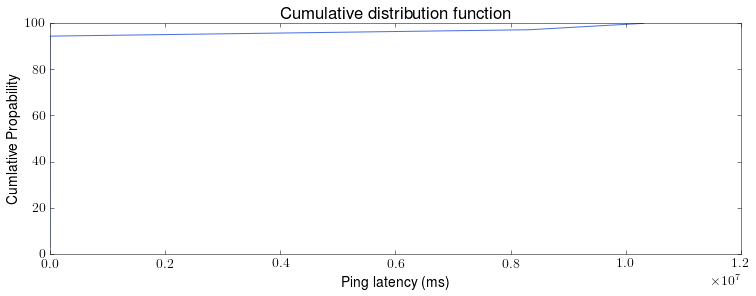

In [29]:
# plot simple CFD
fig = plt.figure(figsize=[12,4])
axes = fig.add_axes([0.1, 0.1, 0.8, 0.8])

axes.set_xlabel('Ping latency (ms)')
axes.set_ylabel('Cumlative Propability')
axes.set_title('Cumulative distribution function')

axes.plot(latency_all, tcdf_y)
